<a href="https://colab.research.google.com/github/Contrerasjosed1/DespliegueSolucionesAnalitica/blob/Dashboard_JC/Proyecto_1_Despliegue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías y cargar datos

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
df = pd.read_csv('ARREGLO_DIRECTO.csv', delimiter=';')

In [ ]:
df.head(5)

,PAID,FECHA_REGISTRO,UNIDAD_NOMBRE,PROYECTO_RNPC,UNIDAD_DEPARTAMENTO,DESTINO_DEPARTAMENTO,DESTINO_CIUDAD,ATENCION_TIPO_TRAMITE,ATENCION_DESTINO,ATENCION_TEMA,...,TIPO_PRODUCTO,NOMBRE_PRODUCTO,VALOR_PRODUCTO,FECHA_ADQUISICION,FECHA_ULTIMO_ENCUENTRO,FECHA_FIN_ULTIMO_ENCUENTRO,FECHA_FIN_REAL,ENCUENTRO_ACORDADO,FECHA_CONTRATO,DURACION
0,615062,2022-01-21,CB SAN CRISTOBAL,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SAN CRISTOBAL,ARREGLO DIRECTO,SIC,Garantías,...,Bien,FABRICACION SOPORTE CAMA,220000,2021-03-30 00:00,2022-01-31,2022-02-01,2022-02-01,SI,2022-02-01 14:35,11
1,365005,2021-03-05,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Prestación de servicios que suponen la entrega...,...,Bien,cama de 1.40x190 tapizada,180000,2020-12-03 00:00,2021-03-10,2021-03-10,2021-03-10,SI,2021-03-10 11:05,5
2,317494,2020-10-28,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Garantías,...,Bien,celular,100000,2020-10-02 00:00,2020-10-28,2021-02-25,2021-02-25,SI,2021-02-25 13:25,120
3,325526,2020-11-11,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Información o publicidad engañosa,...,Bien,Vehiculo,22500000,2019-11-29 00:00,2020-11-26,2020-11-26,2020-11-26,SI,2020-11-26 11:32,15
4,458104,2021-07-14,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Garantías,...,Servicio,televisor 60 pulgadas marca LG,2600000,2018-05-16 00:00,2021-08-05,2021-08-05,2021-08-05,SI,2021-08-05 12:39,22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   PAID                            3991 non-null   int64 
 1   FECHA_REGISTRO                  3991 non-null   object
 2   UNIDAD_NOMBRE                   3991 non-null   object
 3   PROYECTO_RNPC                   3991 non-null   object
 4   UNIDAD_DEPARTAMENTO             3991 non-null   object
 5   DESTINO_DEPARTAMENTO            3991 non-null   object
 6   DESTINO_CIUDAD                  3991 non-null   object
 7   ATENCION_TIPO_TRAMITE           3991 non-null   object
 8   ATENCION_DESTINO                3991 non-null   object
 9   ATENCION_TEMA                   3991 non-null   object
 10  ATENCION_MOTIVO                 3991 non-null   object
 11  ATENCION_ESTADO                 3991 non-null   object
 12  PERSONA_RANGO_EDAD              3991 non-null   

In [ ]:
# Se crea una función que realiza una exploración general a la base de datos
def descripcion(df):
  print("------------------ Descripción general de los datos ------------------")
  print("")
  print("En total la base de datos tiene " + str(len(df)) + " registros y " + str(df.shape[1])+ " variables.")
  print("")
  if df.isnull().any().any():
    print("Algunas columnas tienen valores faltantes. A continuación se muestra el porcentaje de valores nulos por columna:")
    print(df.isnull().sum() / len(df))
  else:
    print("La base de datos no tiene columnas con valores faltantes")

In [ ]:
descripcion(df)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 3991 registros y 34 variables.

Algunas columnas tienen valores faltantes. A continuación se muestra el porcentaje de valores nulos por columna:
PAID                              0.000000
FECHA_REGISTRO                    0.000000
UNIDAD_NOMBRE                     0.000000
PROYECTO_RNPC                     0.000000
UNIDAD_DEPARTAMENTO               0.000000
DESTINO_DEPARTAMENTO              0.000000
DESTINO_CIUDAD                    0.000000
ATENCION_TIPO_TRAMITE             0.000000
ATENCION_DESTINO                  0.000000
ATENCION_TEMA                     0.000000
ATENCION_MOTIVO                   0.000000
ATENCION_ESTADO                   0.000000
PERSONA_RANGO_EDAD                0.000000
PERSONA_CONDICION_DISCAPACIDAD    0.000000
PERSONA_POBLACION_ESPECIAL        0.000000
PERSONA_GENERO                    0.000000
PERSONA_PROFESION                 0.000000
PERSONA_ACEPTA_HABEA

# Procesamiento de datos

In [ ]:
REGION_DEPTO = {
    'ATLANTICO': 'Caribe',
    'BOLIVAR': 'Caribe',
    'CESAR': 'Caribe',
    'CORDOBA': 'Caribe',
    'SUCRE': 'Caribe',
    'SAN ANDRES': 'Caribe',
    'CAUCA': 'Pacífica',
    'VALLE DEL CAUCA': 'Pacífica',
    'NARIÑO': 'Pacífica',
    'BOGOTA': 'Andina',
    'CUNDINAMARCA': 'Andina',
    'HUILA': 'Andina',
    'TOLIMA': 'Andina',
    'QUINDIO': 'Andina',
    'RISARALDA': 'Andina',
    'SANTANDER': 'Andina',
    'N. DE SANTANDER': 'Andina',
    'META': 'Orinoquia'}




In [ ]:
# Eliminar caracteres no numéricos y convertir a numérico
df['VALOR_PRODUCTO'] = df['VALOR_PRODUCTO'].replace({r'[^\d.]': '', 'INDETERMINADO': None}, regex=True)
df['VALOR_PRODUCTO'] = pd.to_numeric(df['VALOR_PRODUCTO'], errors='coerce')

# Calcular el promedio excluyendo ceros y NaN
promedio = df.loc[df['VALOR_PRODUCTO'] > 0, 'VALOR_PRODUCTO'].mean()

# Imputar los valores de '0' y NaN con el promedio calculado
df['VALOR_PRODUCTO'] = df['VALOR_PRODUCTO'].apply(lambda x: promedio if pd.isna(x) or x == 0 else x)

df['REGION'] = df['UNIDAD_DEPARTAMENTO'].map(REGION_DEPTO)

In [ ]:
variables_interes = ['REGION','ATENCION_TEMA', 'PERSONA_RANGO_EDAD', 'PERSONA_GENERO', 'PERSONA_PROFESION', 'TIPO_PRODUCTO', 'VALOR_PRODUCTO', 'DURACION']
data = df[variables_interes].copy()

In [ ]:
# Codificar variables categóricas
categorical_columns = ['REGION','ATENCION_TEMA', 'PERSONA_RANGO_EDAD', 'PERSONA_GENERO', 'PERSONA_PROFESION', 'TIPO_PRODUCTO']
data_final = pd.get_dummies(data, columns=categorical_columns).astype(int)

In [ ]:
# Identificar las variables independientes
X = data_final.drop('DURACION', axis=1)
# Identificar la variable dependiente
y = data_final['DURACION']

In [ ]:
# Dividir la muestra
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelo 1: Random Forest

## Calibración

In [ ]:
import optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    )
    model.fit(XTrain, yTrain)
    y_pred = model.predict(XTest)
    rmse = np.sqrt(mean_squared_error(yTest, y_pred))
    mae = mean_absolute_error(yTest, y_pred)
    return mae

# Create study object
study = optuna.create_study(direction="minimize")

# Run optimization process
study.optimize(objective, n_trials=15, timeout=1000, show_progress_bar=True)

[I 2024-11-09 15:27:58,938] A new study created in memory with name: no-name-56ebc38f-4c56-44c7-b7de-07a9ca92afe4


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2024-11-09 15:27:59,222] Trial 0 finished with value: 13.335082421428579 and parameters: {'n_estimators': 39, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value: 13.335082421428579.
[I 2024-11-09 15:27:59,783] Trial 1 finished with value: 13.452061274017494 and parameters: {'n_estimators': 72, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 13.335082421428579.
[I 2024-11-09 15:28:00,077] Trial 2 finished with value: 12.869809600831838 and parameters: {'n_estimators': 89, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 2 with value: 12.869809600831838.
[I 2024-11-09 15:28:00,170] Trial 3 finished with value: 12.696428501236394 and parameters: {'n_estimators': 31, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 3 with value: 12.696428501236394.
[I 2024-11-09 15:28:00,378] Trial 4 finished with value: 13.333732702633197 and parameters: {'n_e

In [ ]:
import optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 500, log=True)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    )
    model.fit(XTrain, yTrain)
    y_pred = model.predict(XTest)
    rmse = np.sqrt(mean_squared_error(yTest, y_pred))
    mae = mean_absolute_error(yTest, y_pred)
    return mae

# Create study object
study = optuna.create_study(direction="minimize")

# Run optimization process
study.optimize(objective, n_trials=50, timeout=2000, show_progress_bar=True)

[I 2024-11-09 18:35:18,205] A new study created in memory with name: no-name-c3f2de95-f08c-48f7-953f-1b336066d7fa


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-11-09 18:35:19,189] Trial 0 finished with value: 13.11015862264643 and parameters: {'n_estimators': 141, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 13}. Best is trial 0 with value: 13.11015862264643.
[I 2024-11-09 18:35:20,276] Trial 1 finished with value: 13.514427776087176 and parameters: {'n_estimators': 137, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 0 with value: 13.11015862264643.
[I 2024-11-09 18:35:23,332] Trial 2 finished with value: 13.353796322768604 and parameters: {'n_estimators': 417, 'max_depth': 23, 'min_samples_split': 19, 'min_samples_leaf': 6}. Best is trial 0 with value: 13.11015862264643.
[I 2024-11-09 18:35:24,179] Trial 3 finished with value: 13.429142247263362 and parameters: {'n_estimators': 124, 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 0 with value: 13.11015862264643.
[I 2024-11-09 18:35:24,809] Trial 4 finished with value: 13.284472543380565 and parameters: {

In [ ]:
# Obtener el mejor parámetro encontrado
best_params = study.best_params
print(f"Mejores parámetros: {best_params}")

# Obtener el valor del objetivo (en este caso, el mejor MAE)
best_value = study.best_value
print(f"Mejor valor de MAE: {best_value}")

Mejores parámetros: {'n_estimators': 242, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
Mejor valor de MAE: 12.660917728501985


## Entrenamiento

In [ ]:
# Entrenamiento primer modelo
random_forest_reg = RandomForestRegressor(n_estimators=46, max_depth=2, min_samples_split=3, min_samples_leaf=4, random_state=42)
random_forest_reg.fit(XTrain, yTrain)

RandomForestRegressor(max_depth=2, min_samples_leaf=4, min_samples_split=3,
                      n_estimators=46, random_state=42)

In [ ]:
# Entrenamiento segundo modelo
random_forest_reg = RandomForestRegressor(n_estimators=528, max_depth=2, min_samples_split=6, min_samples_leaf=8, random_state=42)
random_forest_reg.fit(XTrain, yTrain)

RandomForestRegressor(max_depth=2, min_samples_leaf=8, min_samples_split=6,
                      n_estimators=528, random_state=42)

## Desempeño

In [ ]:
# Evaluación
y_pred_rf = random_forest_reg.predict(XTest)
mse_rf = mean_squared_error(yTest, y_pred_rf)
mae_rf = mean_absolute_error(yTest, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mse_rf

1565.1147465146605

                                       Característica  Importancia
0                                      VALOR_PRODUCTO     0.529834
2                                       REGION_Caribe     0.157962
29                      PERSONA_RANGO_EDAD_60-80 años     0.070785
37                        PERSONA_PROFESION_No indica     0.057608
17               ATENCION_TEMA_Protección Contractual     0.040574
39                      PERSONA_PROFESION_Profesional     0.038046
15  ATENCION_TEMA_Prestación de servicios que supo...     0.029101
7        ATENCION_TEMA_Calidad, Idoneidad y seguridad     0.020528
27                      PERSONA_RANGO_EDAD_26-40 años     0.013146
4                                     REGION_Pacífica     0.008977
28                      PERSONA_RANGO_EDAD_41-59 años     0.005383
42                                 TIPO_PRODUCTO_Bien     0.005141
34          PERSONA_PROFESION_Bachiller                   0.005096
43                             TIPO_PRODUCTO_Servicio     0.00

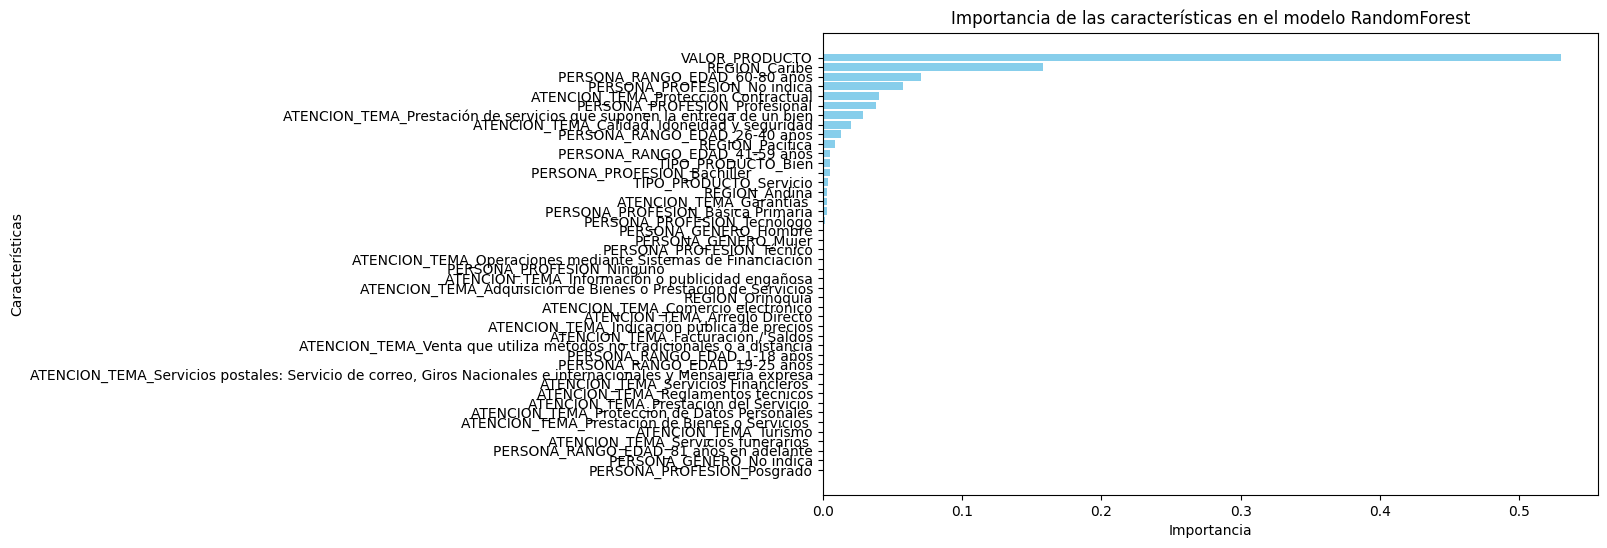

In [ ]:
## Evaluación de características

importancias = random_forest_reg.feature_importances_

# Crear DataFrame
importancia_df = pd.DataFrame({
    'Característica': XTrain.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las importancias de las características
print(importancia_df)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Característica'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo RandomForest')
plt.gca().invert_yaxis()
plt.show()


# Modelo 2
Gradient Boosting Regressor

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Entrenamiento

In [ ]:
# Búsqueda de hiperparámetros con Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
model = grid_search.best_estimator_

# Validación cruzada
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio con validación cruzada:", -scores.mean())

# Entrenamiento del modelo con los mejores hiperparámetros
model.fit(X_train, y_train)

Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
MAE promedio con validación cruzada: 11.800756905584938


GradientBoostingRegressor(learning_rate=0.01, n_estimators=50, random_state=42)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

## Desempeño

In [ ]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Mean Absolute Error (MAE): 10.838615086299113
Mean Squared Error (MSE): 983.9260924922687
Coeficiente de determinación (R²): 0.003691295429752217


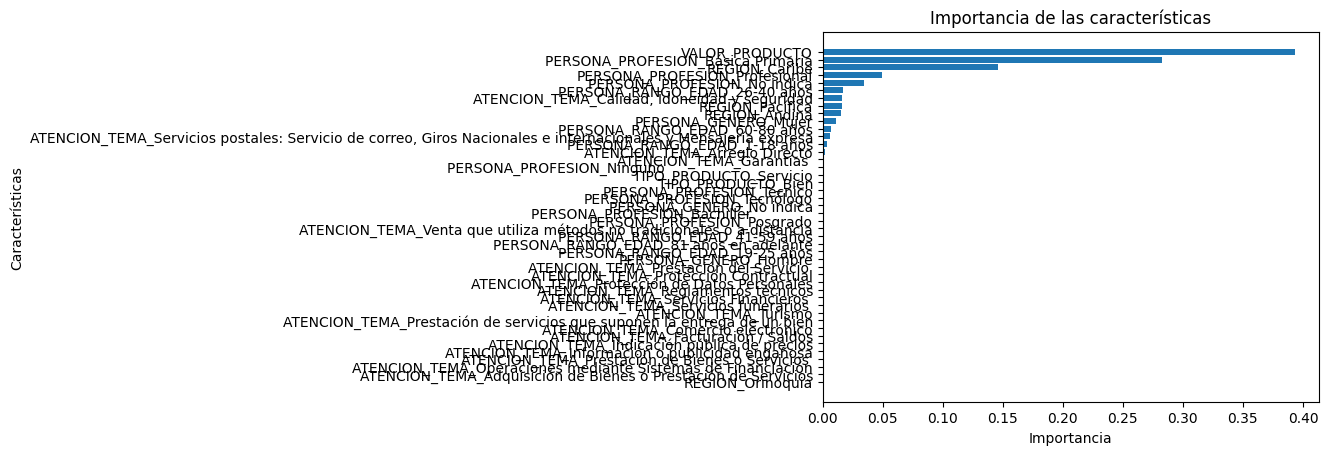

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X.columns

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## Modelo3





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 13.7430 - mean_squared_error: 2847.8284 - val_loss: 11.2285 - val_mean_squared_error: 1572.7896
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9864 - mean_squared_error: 1732.9583 - val_loss: 11.1386 - val_mean_squared_error: 1573.5194
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9363 - mean_squared_error: 1334.9431 - val_loss: 11.0967 - val_mean_squared_error: 1562.5686
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6962 - mean_squared_error: 1422.7836 - val_loss: 11.0708 - val_mean_squared_error: 1568.1896
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0708 - mean_squared_error: 2878.7727 - val_loss: 11.0711 - val_mean_squared_error: 1566.2596
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4849 - mean_squared_error: 2160.5303 - val_loss: 11.0722 - val_mean_squared_error: 1557.8217
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8488 - me

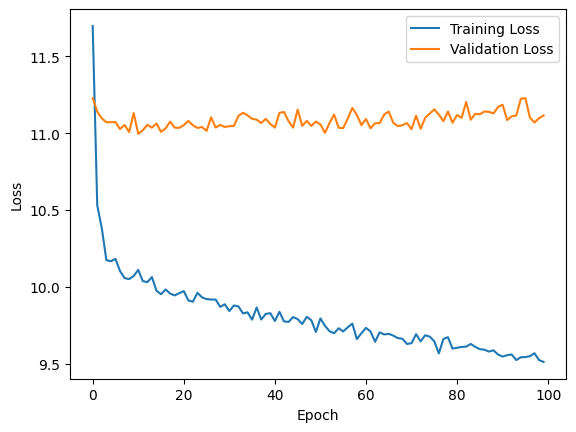

In [ ]:
# Preprocesamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Salida lineal para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluación del modelo
loss, mse = model.evaluate(X_test, y_test)
print("Mean Absolute Error (MAE):", loss)
print("Mean Squared Error (MSE):", mse)

# Graficar la pérdida de entrenamiento y validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Modelo 2 con menos variables


Mejores hiperparámetros: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 1.0}
MAE promedio con validación cruzada: 11.800756905584938
Mean Absolute Error (MAE): 10.838615086299113
Mean Squared Error (MSE): 983.9260924922687
Coeficiente de determinación (R²): 0.003691295429752217


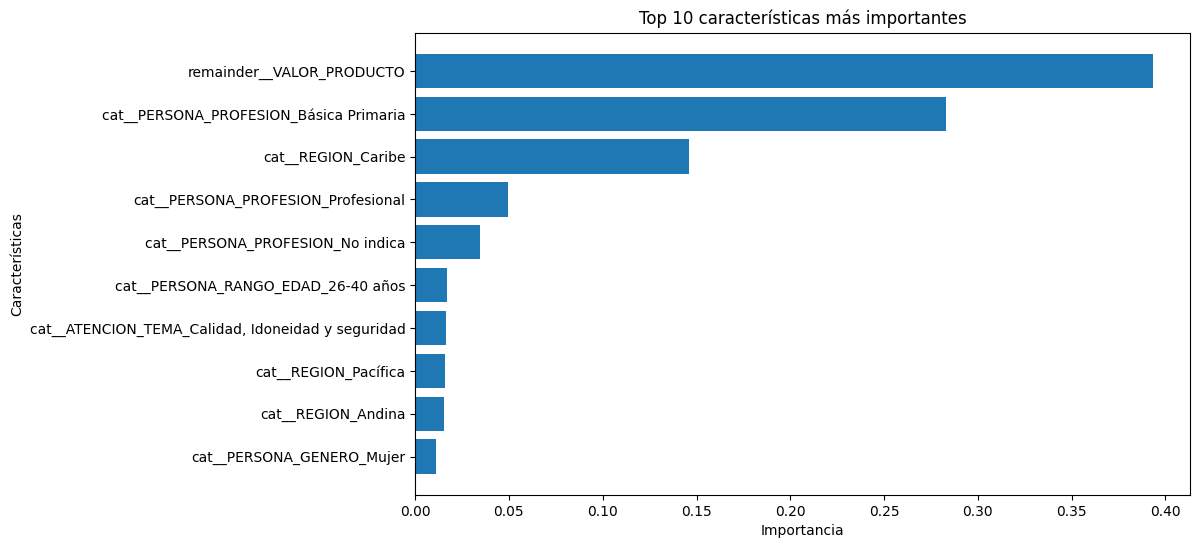

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filtrar solo las variables de interés
variables_interes = ['REGION', 'ATENCION_TEMA', 'PERSONA_RANGO_EDAD', 'PERSONA_GENERO',
                     'PERSONA_PROFESION', 'TIPO_PRODUCTO', 'VALOR_PRODUCTO', 'DURACION']
data = df[variables_interes].copy()

# Dividir en características (X) y variable objetivo (y)
X = data.drop('DURACION', axis=1)  # Asumimos 'DURACION' como variable objetivo
y = data['DURACION']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear transformador para variables categóricas
categorical_features = ['REGION', 'ATENCION_TEMA', 'PERSONA_RANGO_EDAD', 'PERSONA_GENERO', 'PERSONA_PROFESION', 'TIPO_PRODUCTO']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor(random_state=42))])

# Definir el espacio de búsqueda para Grid Search
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Mejor estimador
print("Mejores hiperparámetros:", grid_search.best_params_)
model = grid_search.best_estimator_

# Validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio con validación cruzada:", -scores.mean())

# Entrenar y evaluar el modelo con los mejores hiperparámetros
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

# Importancia de características (solo si el modelo lo permite)
feature_importance = model.named_steps['model'].feature_importances_
sorted_idx = np.argsort(feature_importance)
features = model.named_steps['preprocessor'].get_feature_names_out()

top_n = 10
sorted_idx = np.argsort(feature_importance)[-top_n:]
top_features = [features[i] for i in sorted_idx]
top_importance = feature_importance[sorted_idx]

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), top_importance, align='center')
plt.yticks(range(len(sorted_idx)), top_features)
plt.title('Top 10 características más importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

[I 2024-11-09 17:58:08,225] A new study created in memory with name: no-name-16e14e9c-83d6-49d8-b5d2-d830d387113f


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2024-11-09 17:58:08,437] Trial 0 finished with value: 12.222343988824626 and parameters: {'n_estimators': 18, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 12.222343988824626.
[I 2024-11-09 17:58:08,850] Trial 1 finished with value: 11.829641445862373 and parameters: {'n_estimators': 39, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 1 with value: 11.829641445862373.
[I 2024-11-09 17:58:10,241] Trial 2 finished with value: 11.822261897285095 and parameters: {'n_estimators': 85, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 2 with value: 11.822261897285095.
[I 2024-11-09 17:58:10,909] Trial 3 finished with value: 11.708033359768386 and parameters: {'n_estimators': 66, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 3 with value: 11.708033359768386.
[I 2024-11-09 17:58:10,994] Trial 4 finished with value: 10.9241669491944 and parameters: {'n_est

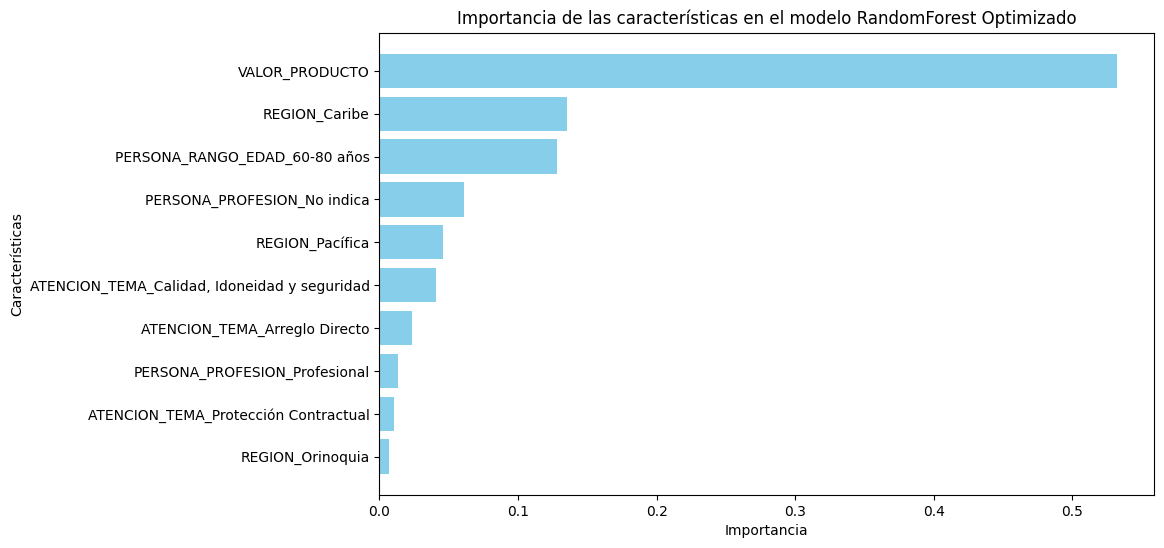

In [ ]:
import optuna
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir valores para los hiperparámetros
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Definir el modelo
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicción y cálculo de métricas
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

# Crear el estudio Optuna y optimizar
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15, timeout=1000, show_progress_bar=True)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42,
)
best_rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Resultados de Evaluación:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)

# Importancia de características
importancias = best_rf_model.feature_importances_
importancia_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las importancias de las características
print("\nImportancia de las características:")
print(importancia_df.head(10))

# Visualización de la importancia de características
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Característica'].head(10), importancia_df['Importancia'].head(10), color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en el modelo RandomForest Optimizado')
plt.gca().invert_yaxis()
plt.show()
